In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [3]:
#helper function
def sortXAndY(x,y):
    perm = x.argsort()
    return x[perm],y[perm]

In [4]:
#For the purpose of this exercices we consider the simple noisy sine function.
def true_f(x):
    return np.sin(2*np.pi*x)

def sampleWithNoise(nSamples = 100, noiseFraction = 0.3, f = true_f):
    x = np.sort(np.random.rand(nSamples))
    return x, f(x) + noiseFraction* np.random.normal(0,1,len(x))

In [5]:
# Number of samples.
samples = 100
# Fraction which determines how noisy is or sampled model.
frac =0.3
# Polynomial degree used to fit the model.
polynomialDegree = 1
# If true the penalty term in the cost function will be used
withRegularization = True
# The regularization parameter, which determines the strength of the penalty term.
alpha = 0.5
# In what ratio our sample will be divided into the training and test sets
# e.g. 0.8 means 80% of sampels for training and 20% for evaluation.
trainTestSplit = 0.8

if not withRegularization:
    alpha = 1.5

In [8]:
# Get our samples from the model. For the model details please check.
# model.py.
x, y = sampleWithNoise(nSamples = samples, noiseFraction = frac)

# We split our samples into training and tests sets, the samples are chosen randomly.
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size = trainTestSplit)

# We sort our divided sets to arrange them in ascending order with respect to x.
xTrain,yTrain  = sortXAndY(xTrain,yTrain)
xTest,yTest  = sortXAndY(xTest,yTest)

# To use linear regression with the polynomial fit, we add polynomial features from
# our original ones.x1=x --> x1=x, x2=x^2, etc.  e.g. [[2]] - > [[2], [4]]
# Please note that also mixed terms will be used. For more details see:
# http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html
poly = PolynomialFeatures(degree=polynomialDegree, include_bias =False)
# The reshape(-1,1) is a technical trick necessary only in case if we have only one feature per sample.
xTrainPolynomial = poly.fit_transform(xTrain.reshape(-1, 1))
xTestPolynomial = poly.fit_transform(xTest.reshape(-1, 1))

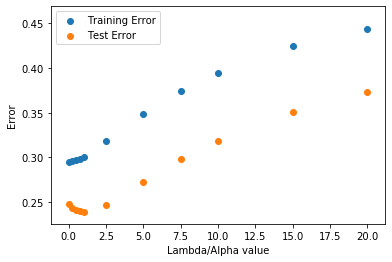

In [9]:
#Up to this point everythin was taken from 
#https://github.com/wkrzemien/dataScienceAndML2020/blob/master/notebooks/regularization/regularization.ipynb
LAMBDA = [0, 0.25, 0.5, 0.75, 1, 2.5, 5, 7.5, 10, 15, 20] 
mseTrainArray = []
mseTestArray = []
for ic in range(0, len(LAMBDA)):
    reg = None
    reg = linear_model.Ridge (alpha = LAMBDA[ic])

    # We train our model.
    reg.fit(xTrainPolynomial,yTrain)
    # We predict values from the training and test sets, based on our trained model.
    yPredictTrain= reg.predict(xTrainPolynomial)
    yPredictTest=reg.predict(xTestPolynomial)

    # We calculate the train and test errors.
    mseTrain = mean_squared_error(yTrain, yPredictTrain)
    mseTest = mean_squared_error(yTest, yPredictTest)

    mseTrainArray.append(mseTrain)
    mseTestArray.append(mseTest)
    
plt.figure(1)
plt.scatter(LAMBDA, mseTrainArray, label = "Training Error")
plt.scatter(LAMBDA, mseTestArray, label = "Test Error")

plt.xlabel("Lambda/Alpha value")
plt.ylabel("Error")
plt.legend(loc="best")


In [18]:
# TO answer first part of the question, Alpha/Lamba should be around 1, then Test error is closest to one

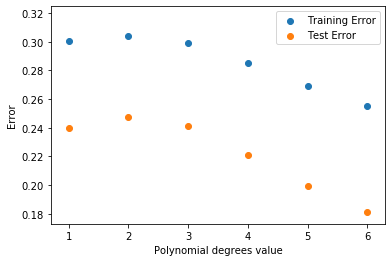

In [11]:
Poly = [1, 2, 3, 4, 5, 6] 
mseTrainArray2 = []
mseTestArray2 = []
for ic in range(0, len(Poly)):
    poly = PolynomialFeatures(degree=Poly[ic], include_bias =False)
    # The reshape(-1,1) is a technical trick necessary only in case if we have only one feature per sample.
    xTrainPolynomial = poly.fit_transform(xTrain.reshape(-1, 1))
    xTestPolynomial = poly.fit_transform(xTest.reshape(-1, 1))
    reg = None
    reg = linear_model.Ridge (alpha = 1) #hardcoded value of alpha
    
    # We train our model.
    reg.fit(xTrainPolynomial,yTrain)
    # We predict values from the training and test sets, based on our trained model.
    yPredictTrain= reg.predict(xTrainPolynomial)
    yPredictTest=reg.predict(xTestPolynomial)

    # We calculate the train and test errors.
    mseTrain = mean_squared_error(yTrain, yPredictTrain)
    mseTest = mean_squared_error(yTest, yPredictTest)

    mseTrainArray2.append(mseTrain)
    mseTestArray2.append(mseTest)

plt.figure(1)
plt.scatter(Poly, mseTrainArray2, label = "Training Error")
plt.scatter(Poly, mseTestArray2, label = "Test Error")

plt.xlabel("Polynomial degrees value")
plt.ylabel("Error")
plt.legend(loc="best")